Author: Maxime Corlay

# ⚠ instructions to read (before running the notebook) ⚠


✅ It is a work made using this main paper: https://github.com/mlpc-ucsd/TokenCompose

✅ This work uses a pipeline from Hugging Face: https://huggingface.co/mlpc-lab/TokenCompose_SD14_A

✅ Hugging Face website: https://huggingface.co/

✅ I used A100 GPU (40Go of RAM) in Google Colab

❌ Don't execute this file without the other files of the repository: https://github.com/maximecorlay/MVA-ORCV-Final-Project

✅ Ensure that you have at least the folder `coco_gsam_seg`

✅ In this file, there are code cells:

* First cell: loads the model
* 2nd cell: connects the drive to Google Colab (ensure to change the path)
* 3rd cell: to test if the hooks work correctly (you should obtain some attention maps)
* Then there is a choice to make: run cell 4 OR 5 OR 6 (because the training strategy is different)
* Finally run cell 7 to plot cross attention maps AFTER training (to compare with cell 3)


⚠ You MUST run cell 3 before running cells 4, 5, 6 or 7

✅ For instance, you can run: 1, 2, 3, 4, 7

✅ You can run: 1, 2, 3, 5, 7

✅ You can run: 1, 2, 3, 6, 7

❌ You can't run: 1, 2, 3, 4, 5, 7 (because you run two trainings)

❌ You can't run: 1, 2, 4, 7 (because it is mandatory to run cell 3 before >=4)



In [1]:
# Cell 1 (2 min)
# import everything
from diffusers import StableDiffusionPipeline
from PIL import Image
import numpy as np
import torch
from torchvision import transforms
from torch.optim import AdamW
from torch.utils.data import DataLoader
from tqdm import tqdm
import matplotlib.pyplot as plt

# load the model
model_id = "mlpc-lab/TokenCompose_SD14_A"

pipe = StableDiffusionPipeline.from_pretrained(model_id, torch_dtype=torch.float32)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

In [2]:
# Cell 2 (3s)
import sys
from google.colab import drive
drive.mount('/content/drive')
# ensure to change the path
%cd /content/drive/MyDrive/Colab/Projet
!pwd  # check that you're in the right directory
!ls # you should see coco_gsam_seg and src.ipynb

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab/Projet
/content/drive/MyDrive/Colab/Projet
coco_gsam_seg  model_checkpoint.pth  src.ipynb	training_losses.png  validation_losses.png


### Try recovering attention map with a hook

using GPU
torch.Size([1, 20, 768])
torch.Size([1, 3, 512, 512])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
loss_ldm: 13.763618469238281


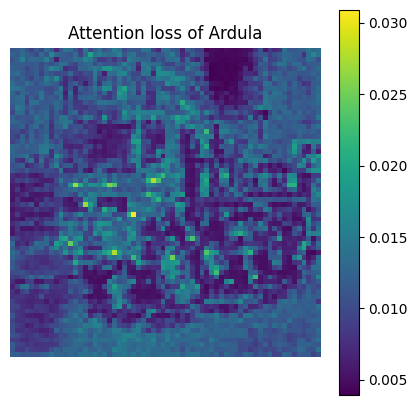

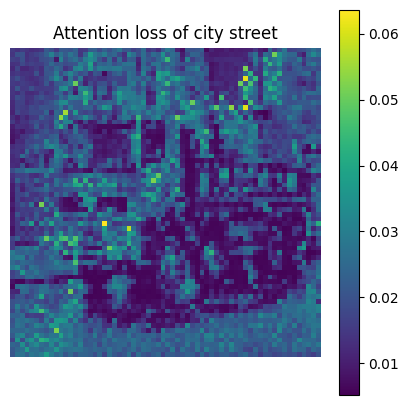

ltoken: 0.9376367926597595
lpixel: 11381.5166015625
loss_ldm: 13.763618469238281
torch.Size([1, 11, 768])
torch.Size([1, 3, 512, 512])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
loss_ldm: 13.129984855651855


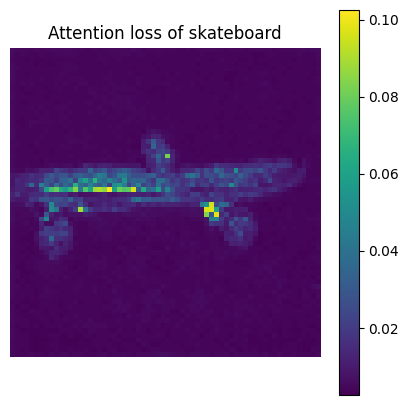

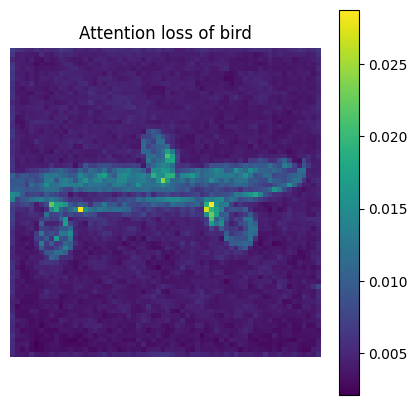

ltoken: 1.3042649030685425
lpixel: 2389.986572265625
loss_ldm: 13.129984855651855
torch.Size([1, 13, 768])
torch.Size([1, 3, 512, 512])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
loss_ldm: 14.007648468017578


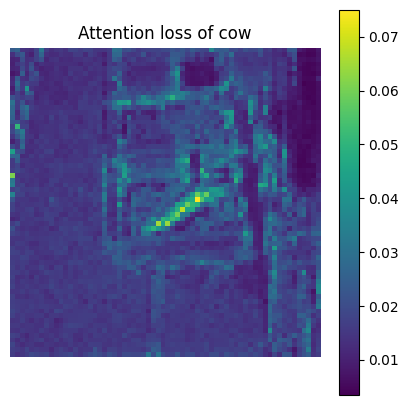

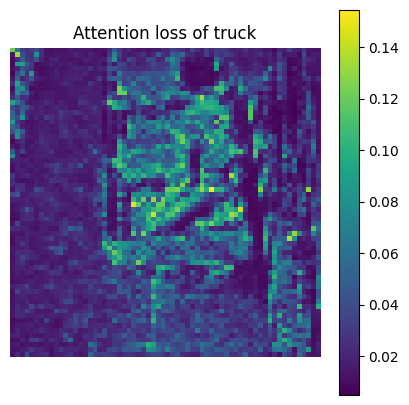

ltoken: 1.4231631755828857
lpixel: 3235.908447265625
loss_ldm: 14.007648468017578
torch.Size([1, 14, 768])
torch.Size([1, 3, 512, 512])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
loss_ldm: 17.65062713623047


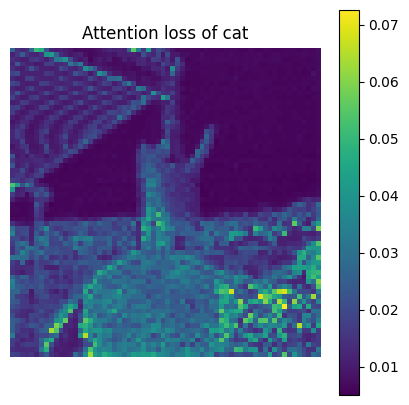

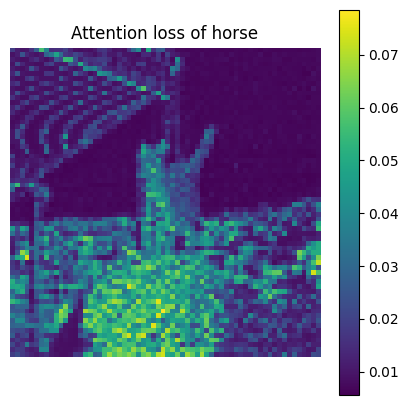

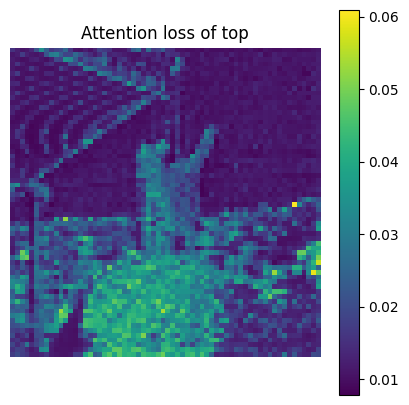

ltoken: 2.268068313598633
lpixel: 4732.837890625
loss_ldm: 17.65062713623047
torch.Size([1, 17, 768])
torch.Size([1, 3, 512, 512])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
loss_ldm: 23.093286514282227


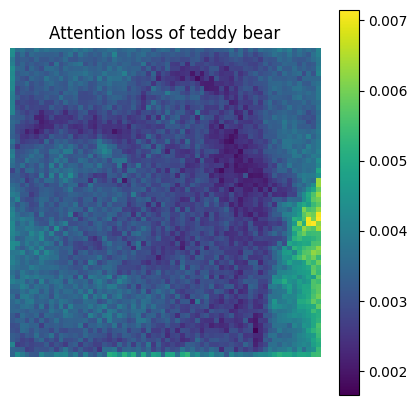

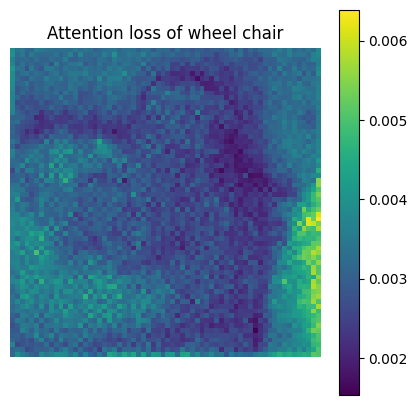

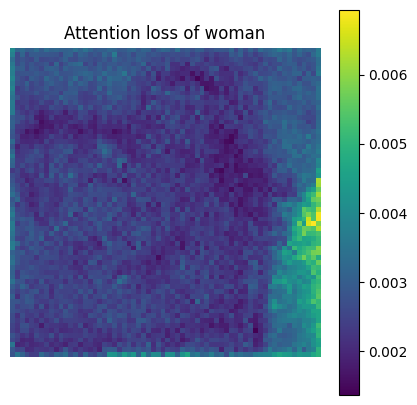

ltoken: 2.0027060508728027
lpixel: 14378.2265625
loss_ldm: 23.093286514282227
torch.Size([1, 11, 768])
torch.Size([1, 3, 512, 512])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
loss_ldm: 12.383252143859863


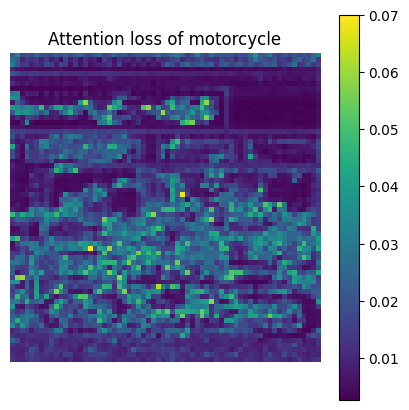

ltoken: 0.6025307774543762
lpixel: 2938.98583984375
loss_ldm: 12.383252143859863
torch.Size([1, 12, 768])
torch.Size([1, 3, 512, 512])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
loss_ldm: 21.40278434753418


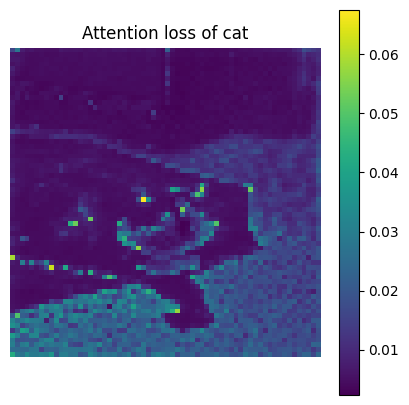

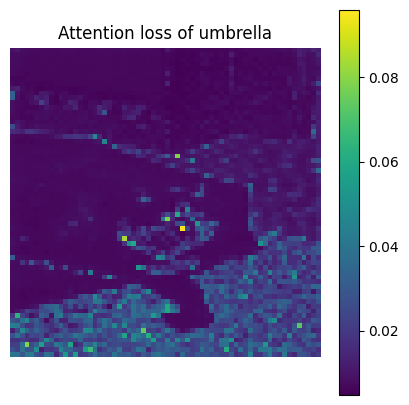

ltoken: 1.3536522388458252
lpixel: 9526.09765625
loss_ldm: 21.40278434753418
torch.Size([1, 11, 768])
torch.Size([1, 3, 512, 512])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
loss_ldm: 22.163959503173828


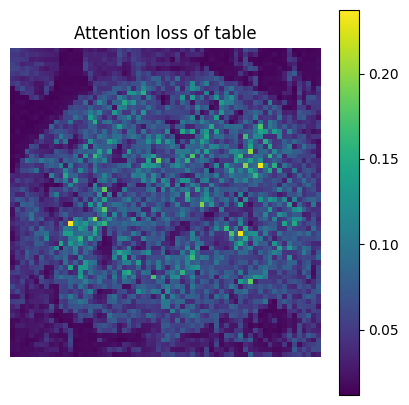

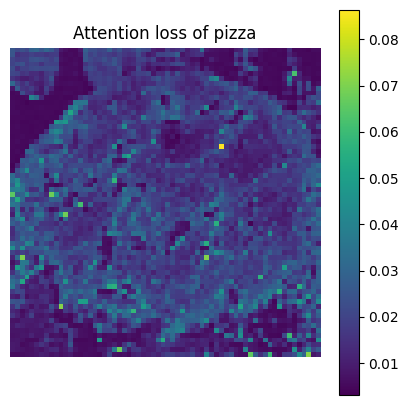

ltoken: 0.08601750433444977
lpixel: 19863.953125
loss_ldm: 22.163959503173828
torch.Size([1, 20, 768])
torch.Size([1, 3, 512, 512])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
loss_ldm: 19.324832916259766


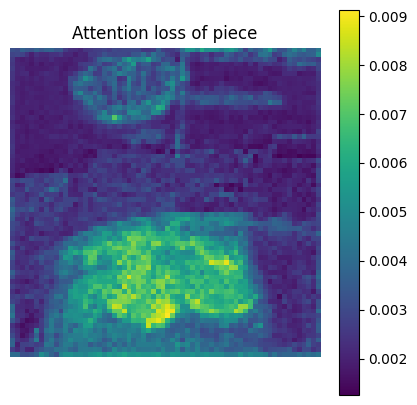

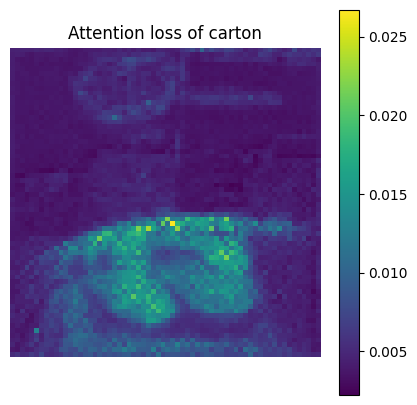

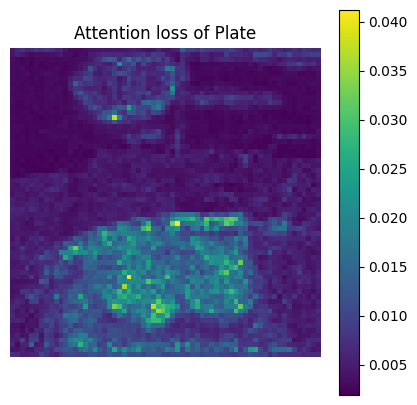

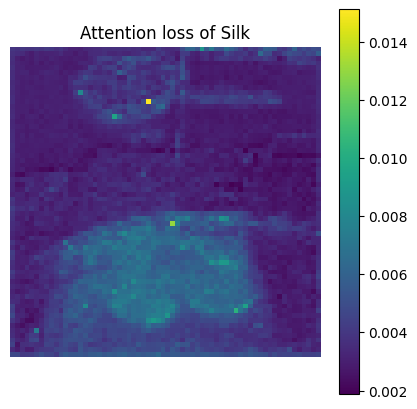

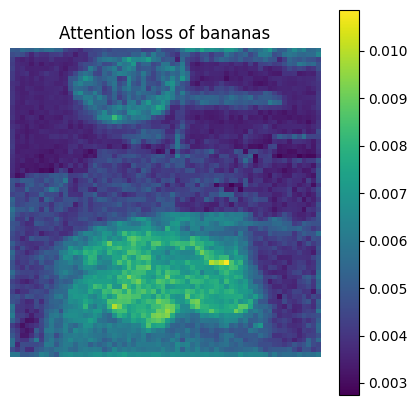

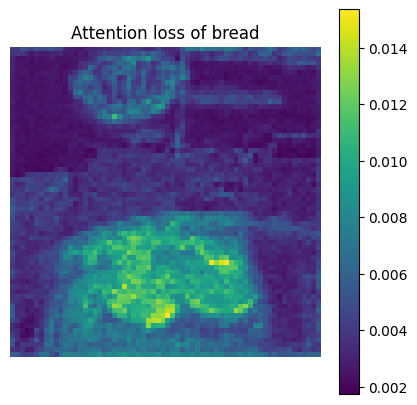

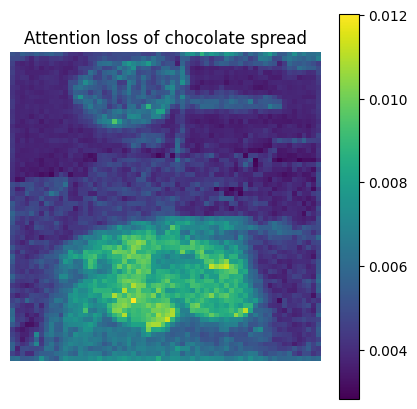

ltoken: 5.333616256713867
lpixel: 18490.05859375
loss_ldm: 19.324832916259766
torch.Size([1, 14, 768])
torch.Size([1, 3, 512, 512])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])
loss_ldm: 21.163894653320312


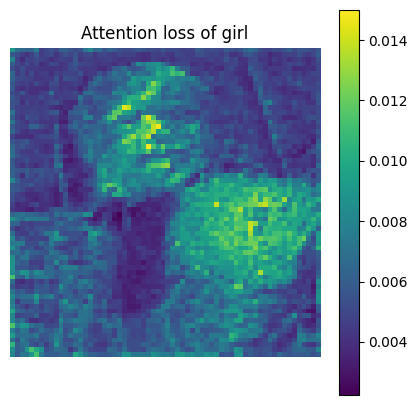

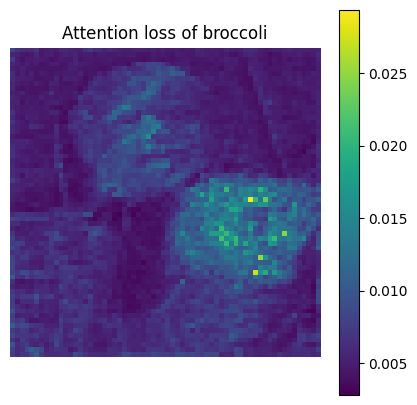

ltoken: 0.9007028341293335
lpixel: 11465.35546875
loss_ldm: 21.163894653320312


In [3]:
# Cell 3 (40s)
def compute_attention_scores():
    # q_activations and k_activations are of size: [1,4096,320]
    '''
    Tip: How did I know the infrastructure was like "transformer_block.attn2" ? How did I know the attributes ?
    Because I spent a lot of time. More precisely, writing yourself the code in the cell gives you suggestions (in a little framework that appears).
    Sometimes, a link is in that framework, so I was looking for a link. I found one and it gave me the code of the architecture.
    Another way is to do usr/local/lib/python3-10/dist-packages/diffusers (something like that) and you can find also the code.
    The advantage of the second method is that you obtain all the code, the disadvantage is that you have to find what you're interested in (and that's not easy because there a LOT of code)
    '''
    query = transformer_block.attn2.head_to_batch_dim(q_activations)  #size: [8,4096,40]
    key = transformer_block.attn2.head_to_batch_dim(k_activations)      # size: [8,14,40]
    scale=transformer_block.attn2.scale
    attention_scores=torch.bmm(query,key.transpose(-1,-2))  #size: [8,4096,14] # bmm means batch matrix-matrix multiplication
    attention_scores=attention_scores*scale
    attention_probs = attention_scores.softmax(dim=-1)
    return attention_probs

if torch.cuda.is_available():
  device=torch.device("cuda")
  print(f"using GPU")
else:
  device=torch.device("cpu")
  print(f"using CPU")

# for the moment we are only considering the first two lines of the dataset
data = [
    {"file_name": "000000001523.jpg", "text": "A red and blue dump truck marked 'Ardula' is shown on a city street.", "attn_list": [["Ardula", "seg/000000001523/mask_000000001523_Ardula.png"], ["city street", "seg/000000001523/mask_000000001523_city_street.png"]]},
    {"file_name": "000000001561.jpg", "text": "A very small bird sitting on a skateboard.", "attn_list": [["skateboard", "seg/000000001561/mask_000000001561_skateboard.png"], ["bird", "seg/000000001561/mask_000000001561_bird.png"]]},
    {"file_name": "000000001590.jpg", "text": "A cow stands in the back of a large truck.", "attn_list": [["cow", "seg/000000001590/mask_000000001590_cow.png"], ["truck", "seg/000000001590/mask_000000001590_truck.png"]]},
    {"file_name": "000000001323.jpg", "text": "An orange cat standing on the top of a brown horse.", "attn_list": [["cat", "seg/000000001323/mask_000000001323_cat.png"], ["horse", "seg/000000001323/mask_000000001323_horse.png"], ["top", "seg/000000001323/mask_000000001323_top.png"]]},
    {"file_name": "000000001237.jpg", "text": "An older woman sitting in a wheel chair holding a big white teddy bear.", "attn_list": [["teddy bear", "seg/000000001237/mask_000000001237_teddy_bear.png"], ["wheel chair", "seg/000000001237/mask_000000001237_wheel_chair.png"], ["woman", "seg/000000001237/mask_000000001237_woman.png"]]},
    {"file_name": "000000000723.jpg", "text": "A large motorcycle sits outside of a bar.", "attn_list": [["motorcycle", "seg/000000000723/mask_000000000723_motorcycle.png"]]},
    {"file_name": "000000001139.jpg", "text": "A cat sits in an opened, overturned umbrella.", "attn_list": [["cat", "seg/000000001139/mask_000000001139_cat.png"], ["umbrella", "seg/000000001139/mask_000000001139_umbrella.png"]]},
    {"file_name": "000000000397.jpg", "text": "A prepared pizza being served at a table.", "attn_list": [["table", "seg/000000000397/mask_000000000397_table.png"], ["pizza", "seg/000000000397/mask_000000000397_pizza.png"]]},
    {"file_name": "000000000142.jpg", "text": "Plate with a piece of bread, dark chocolate spread, bananas and a carton of Silk.", "attn_list": [["piece", "seg/000000000142/mask_000000000142_piece.png"], ["carton", "seg/000000000142/mask_000000000142_carton.png"], ["Plate", "seg/000000000142/mask_000000000142_Plate.png"], ["Silk", "seg/000000000142/mask_000000000142_Silk.png"], ["bananas", "seg/000000000142/mask_000000000142_bananas.png"], ["bread", "seg/000000000142/mask_000000000142_bread.png"], ["chocolate spread", "seg/000000000142/mask_000000000142_chocolate_spread.png"]]},
    {"file_name": "000000000370.jpg", "text": "A little girl holds a piece of broccoli towards the camera.", "attn_list": [["girl", "seg/000000000370/mask_000000000370_girl.png"], ["broccoli", "seg/000000000370/mask_000000000370_broccoli.png"]]}
]


validation_data = [
    {"file_name": "000000001290.jpg", "text": "a close up of two children at a table with a cake", "attn_list": [["table", "seg/000000001290/mask_000000001290_table.png"], ["children", "seg/000000001290/mask_000000001290_children.png"], ["cake", "seg/000000001290/mask_000000001290_cake.png"]]},
    {"file_name": "000000000650.jpg", "text": "A cat sitting on top of a car near bushes.", "attn_list": [["cat", "seg/000000000650/mask_000000000650_cat.png"], ["car", "seg/000000000650/mask_000000000650_car.png"], ["bushes", "seg/000000000650/mask_000000000650_bushes.png"], ["top", "seg/000000000650/mask_000000000650_top.png"]]},
    {"file_name": "000000000443.jpg", "text": "A cat is lying on its back in a man's lap.", "attn_list": [["cat", "seg/000000000443/mask_000000000443_cat.png"], ["man", "seg/000000000443/mask_000000000443_man.png"]]},
    {"file_name": "000000000599.jpg", "text": "A cat sitting on a couch with two remote controls. ", "attn_list": [["controls", "seg/000000000599/mask_000000000599_controls.png"], ["cat", "seg/000000000599/mask_000000000599_cat.png"], ["couch", "seg/000000000599/mask_000000000599_couch.png"]]}
    ]

# load components
tok=pipe.components['tokenizer']
enc=pipe.components['text_encoder'].to(device)
vae=pipe.components['vae'].to(device)
une=pipe.components['unet'].to(device)
sch=pipe.components['scheduler']

# inference mode
enc.eval()
vae.eval()
une.eval()

for d in data:
    # Retrieve the prompt and run it through the tokenizer (CPU) then text_encoder (GPU)
    toks=tok(text=d["text"],return_tensors='pt') # if I don't fill in return_tensors, the elements of toks will be lists (but encs takes tensors as inputs) -> 'pt'="pytorch"
    toks={Key:Value.to(device) for Key,Value in toks.items()}  # transfer the data on GPU
    encs=enc(input_ids=toks['input_ids'],attention_mask=toks['attention_mask'])
    print(encs.last_hidden_state.shape)
    # torch.Size([1, 20, 768]) for the 1st image
    # torch.Size([1, 14, 768]) for the 2nd image (only the length of sequence varies)
    # (batch size, sequence length, dimension of text embedding)

    # Retrieving the image and transferring it to the vae
    photo_path = "./coco_gsam_seg/" + d["file_name"][0:-4] + "/src.jpg"
    photo=Image.open(photo_path)
    photo=photo.resize((512, 512))
    photo_array=np.array(photo)
    photo_tensor=torch.tensor(photo_array, dtype=torch.float32).permute(2,0,1)/255.0
    photo_tensor=photo_tensor.unsqueeze(0).to(device)  # vae takes 4-dimension tensor as input so we must add a first dimension artificially
    print(photo_tensor.shape)
    # torch.Size([1, 3, 512, 512])

    # encode the photo with autoencoder kl to obtain latent
    lat=vae.encode(photo_tensor)
    lat_tens=lat.latent_dist.sample() # obtain the tensor associated with the latent
    print(lat_tens.shape)
    # torch.Size([1, 4, 64, 64])

    # add noise
    # here I used the code from https://github.com/mlpc-ucsd/TokenCompose
    noise = torch.randn_like(lat_tens)
    bsz = lat_tens.shape[0]
    max_timestep = sch.config.num_train_timesteps
    timesteps = torch.randint(0, max_timestep, (bsz,), device=lat_tens.device)
    timesteps = timesteps.long()
    noisy_latents = sch.add_noise(lat_tens, noise, timesteps)
    print(noisy_latents.shape)
    # torch.Size([1, 4, 64, 64])

    '''
    We add the hook just right here
    '''
    def q_hook(module, input, output):
        global q_activations   # we say that the variable q_activations is global. Otherwise, it is a local variable which doesn't appear outside the function
        q_activations=output

    def k_hook(module, input, output):
        global k_activations
        k_activations=output

    # we are interested in that map:
    transformer_block=une.up_blocks[3].attentions[2].transformer_blocks[0]
    transformer_block.attn2.to_k.register_forward_hook(k_hook)
    transformer_block.attn2.to_q.register_forward_hook(q_hook)

    # use unet
    prediction=une(noisy_latents,timesteps,encs.last_hidden_state).sample
    # print(prediction.shape)
    # torch.Size([1, 4, 64, 64])

    # Loss LDM
    loss_ldm=torch.nn.functional.mse_loss(prediction,lat_tens)
    print(f"loss_ldm: {loss_ldm}")
    # tensor(16.7185, device='cuda:0', grad_fn=<MseLossBackward0>) for the 1st image
    # tensor(19.2932, device='cuda:0', grad_fn=<MseLossBackward0>) fir the 2nd image

    del prediction
    del lat
    del lat_tens
    del noise
    del bsz
    del max_timestep
    del timesteps
    del noisy_latents
    del toks
    del encs

    # Ltoken and Lpixel
    ltoken=0
    lpixel=0
    for token in d["attn_list"]:
      photo_path_token="./coco_gsam_"+token[1] # obtain the path to the attention mask
      photo_token=Image.open(photo_path_token).convert('L')  # L is to obtain a single channel (which is what we want, because masks are black and white)
      photo_token=photo_token.resize((64, 64)) # convert to the size of the latent
      photo_array_token=np.array(photo_token)
      photo_tensor_token=torch.tensor(photo_array_token, dtype=torch.float32)/255.0

      del photo_path_token
      del photo_token
      del photo_array_token

      # retrieve the token indices corresponding to the word we're looking for in the attention map
      toks_list=tok(text=d["text"])
      toks_word=tok(text=token[0])
      token_indices=[]
      for k in range(len(toks_list['input_ids'])):
        if toks_list['input_ids'][k]==toks_word['input_ids'][1]:
          if len(toks_list['input_ids'][k:])>=len(toks_word['input_ids'])-2:
            equal_for_the_moment=True
            for l in range(1,len(toks_word['input_ids'])-1):
              if toks_list['input_ids'][k+l-1]!=toks_word['input_ids'][l]:
                equal_for_the_moment=False
            if equal_for_the_moment:
              token_indices=list(range(k,k+len(toks_word['input_ids'])-2))

      attention_scores=compute_attention_scores()
      mean_attention = attention_scores[:,:,token_indices].mean(dim=2).mean(dim=0).reshape(64,64)

      del token_indices
      del toks_word
      del attention_scores
      del toks_list

      mean_attention_plot=mean_attention.cpu().detach()
      plt.figure(figsize=(5,5))
      plt.imshow(mean_attention_plot, cmap='viridis')
      plt.colorbar()
      plt.title(f'Attention loss of {token[0]}')
      plt.axis('off')
      plt.show()

      del mean_attention_plot

      photo_tensor_token=photo_tensor_token.to(device)
      pixelwise_product=photo_tensor_token*mean_attention

      sum_pixelwise=pixelwise_product.sum()
      sum_mean_attention=mean_attention.sum()

      log_mean_attention=torch.log(mean_attention)  # log(prediction)
      log_one_minus_mean_attention=torch.log(1-mean_attention)  # log(1-prediction)
      a=photo_tensor_token*log_mean_attention  # image_tensor_token[u]*log(prediction[u])
      b=(1-photo_tensor_token)*log_one_minus_mean_attention  # (1-image_tensor_token[u])*log(1-prediction[u])
      final_result=(a+b).sum()

      del photo_tensor_token
      del pixelwise_product
      del mean_attention
      del a
      del b
      del log_mean_attention
      del log_one_minus_mean_attention

      ratio=sum_pixelwise/sum_mean_attention
      result=(1-ratio)**2
      ltoken+=result
      lpixel-=final_result

      del ratio
      del sum_pixelwise
      del sum_mean_attention
    print(f"ltoken: {ltoken}")
    print(f"lpixel: {lpixel}")
    print(f'loss_ldm: {loss_ldm}')

    #loss_ldm0=loss_ldm
    #ltoken0=ltoken
    #lpixel0=lpixel
    loss_ldm0=20
    ltoken0=1
    lpixel0=10000

### Training LDM+LTOKEN

Epoch 1/200:
Average Loss: 2.3587
Average LDM Loss: 18.2316
Average Token Loss: 1.4471
Epoch 2/200:
Average Loss: 1.9573
Average LDM Loss: 18.5004
Average Token Loss: 1.0323
Epoch 3/200:
Average Loss: 2.1902
Average LDM Loss: 18.2800
Average Token Loss: 1.2762
Epoch 4/200:
Average Loss: 1.9354
Average LDM Loss: 17.4451
Average Token Loss: 1.0631
Epoch 5/200:
Average Loss: 1.8127
Average LDM Loss: 18.0024
Average Token Loss: 0.9125
Epoch 6/200:
Average Loss: 1.5826
Average LDM Loss: 16.3945
Average Token Loss: 0.7629
Epoch 7/200:
Average Loss: 1.5990
Average LDM Loss: 17.8389
Average Token Loss: 0.7071
Epoch 8/200:
Average Loss: 1.4563
Average LDM Loss: 17.0639
Average Token Loss: 0.6031
Epoch 9/200:
Average Loss: 1.5583
Average LDM Loss: 17.8925
Average Token Loss: 0.6637
Epoch 10/200:
Average Loss: 1.3203
Average LDM Loss: 16.3570
Average Token Loss: 0.5024
Epoch 11/200:
Average Loss: 1.3813
Average LDM Loss: 17.3527
Average Token Loss: 0.5136
Epoch 12/200:
Average Loss: 1.5895
Averag

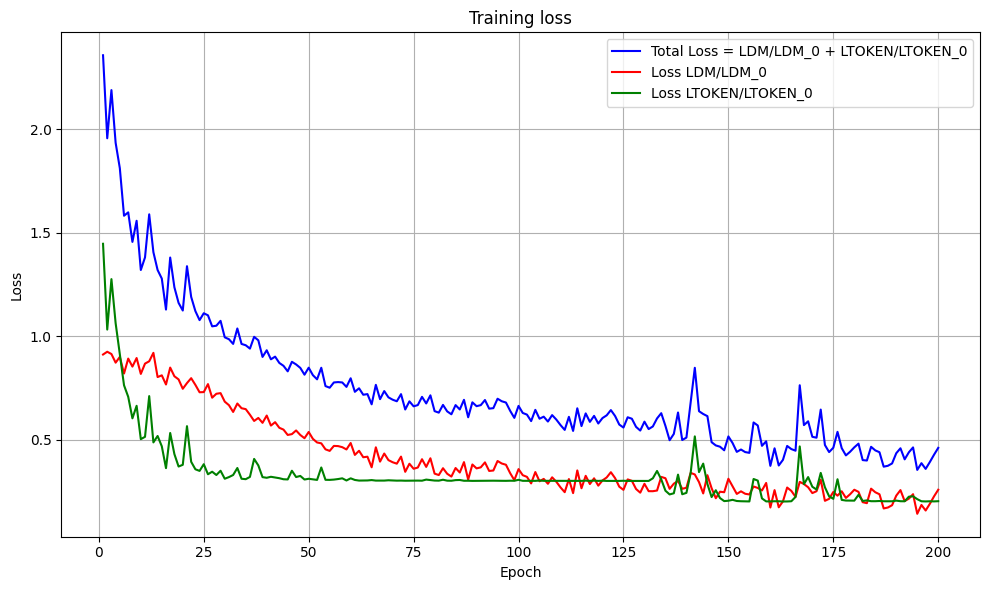

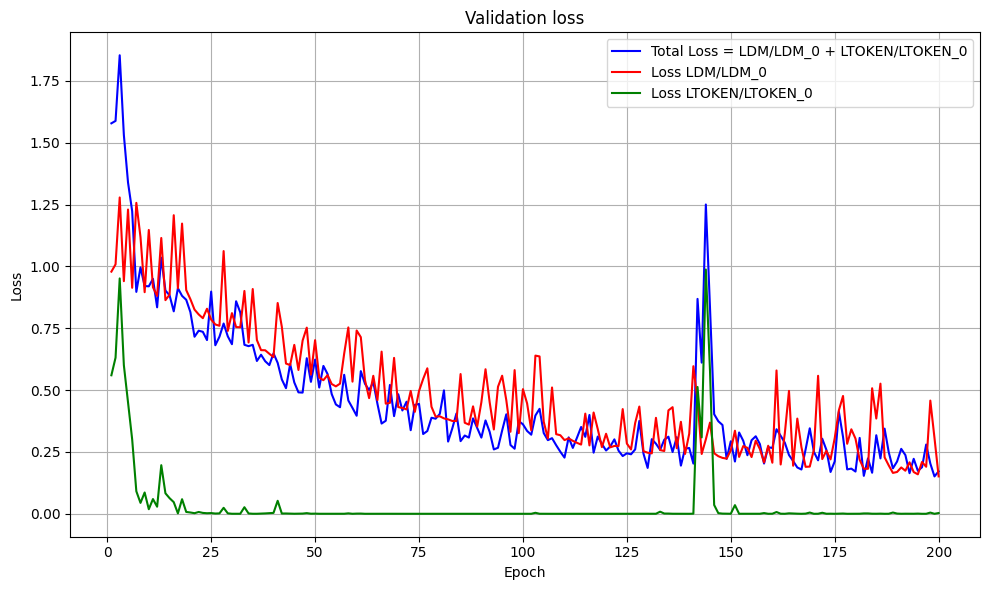

In [6]:
# Cell 4 (13 min)
num_epochs=200
learning_rate=1e-5
batch_size=1

loss_history=[]
ldm_loss_history=[]
token_loss_history=[]

val_loss_history=[]
val_ldm_loss_history=[]
val_token_loss_history=[]

params_to_optimize = [{'params': une.parameters()}]
optimizer = AdamW(params_to_optimize, lr=learning_rate)

# training loop
for epoch in range(num_epochs):
    total_loss=0
    total_ldm_loss=0
    total_token_loss=0

    total_val_loss=0
    total_val_ldm_loss=0
    total_val_token_loss=0

    # training mode (onlu for unet)
    une.train()
    vae.eval()
    enc.eval()
    for d in data:
        optimizer.zero_grad()
        toks = tok(text=d["text"], return_tensors='pt')
        toks = {k: v.to(device) for k, v in toks.items()}
        encs = enc(input_ids=toks['input_ids'], attention_mask=toks['attention_mask'])
        photo_path = "./coco_gsam_seg/" + d["file_name"][0:-4] + "/src.jpg"
        photo = Image.open(photo_path)
        photo = photo.resize((512, 512))
        photo_array = np.array(photo)
        photo_tensor = torch.tensor(photo_array, dtype=torch.float32).permute(2,0,1)/255.0
        photo_tensor = photo_tensor.unsqueeze(0).to(device)
        lat = vae.encode(photo_tensor)
        lat_tens = lat.latent_dist.sample()
        noise = torch.randn_like(lat_tens)
        bsz = lat_tens.shape[0]
        max_timestep = sch.config.num_train_timesteps
        timesteps = torch.randint(0, max_timestep, (bsz,), device=lat_tens.device)
        timesteps = timesteps.long()
        noisy_latents = sch.add_noise(lat_tens, noise, timesteps)

        # hooks
        def q_hook(module, input, output):
            global q_activations
            q_activations=output

        def k_hook(module, input, output):
            global k_activations
            k_activations=output
        transformer_block = une.up_blocks[3].attentions[2].transformer_blocks[0]
        transformer_block.attn2.to_k.register_forward_hook(k_hook)
        transformer_block.attn2.to_q.register_forward_hook(q_hook)

        # prediction
        prediction = une(noisy_latents, timesteps, encs.last_hidden_state).sample

        # ldm
        loss_ldm = torch.nn.functional.mse_loss(prediction, lat_tens)

        # ltoken
        ltoken = 0
        for token in d["attn_list"]:
            photo_path_token = "./coco_gsam_" + token[1]
            photo_token = Image.open(photo_path_token).convert('L')
            photo_token = photo_token.resize((64, 64))
            photo_array_token=np.array(photo_token)
            photo_tensor_token=torch.tensor(photo_array_token, dtype=torch.float32)/255.0
            toks_list = tok(text=d["text"])
            toks_word = tok(text=token[0])
            token_indices = []
            for k in range(len(toks_list['input_ids'])):
                if toks_list['input_ids'][k] == toks_word['input_ids'][1]:
                    if len(toks_list['input_ids'][k:]) >= len(toks_word['input_ids'])-2:
                        equal_for_the_moment = True
                        for l in range(1, len(toks_word['input_ids'])-1):
                            if toks_list['input_ids'][k+l-1] != toks_word['input_ids'][l]:
                                equal_for_the_moment = False
                        if equal_for_the_moment:
                            token_indices = list(range(k, k+len(toks_word['input_ids'])-2))

            attention_scores = compute_attention_scores()
            if attention_scores is not None:
                mean_attention = attention_scores[:,:,token_indices].mean(dim=2).mean(dim=0).reshape(64,64)
                photo_tensor_token = photo_tensor_token.to(device)
                pixelwise_product = photo_tensor_token * mean_attention
                sum_pixelwise = pixelwise_product.sum()
                sum_mean_attention = mean_attention.sum()
                ratio = sum_pixelwise/sum_mean_attention
                result = (1-ratio)**2
                ltoken += result

        # total loss
        loss = loss_ldm/loss_ldm0 + ltoken/ltoken0

        # backward
        loss.backward()
        optimizer.step()

        # loss update
        total_loss+=loss.item()
        total_ldm_loss+=loss_ldm.item()
        total_token_loss+=ltoken.item()

    avg_loss = total_loss/len(data)
    avg_ldm_loss = total_ldm_loss/len(data)
    avg_token_loss = total_token_loss/len(data)

    loss_history.append(avg_loss)
    ldm_loss_history.append(avg_ldm_loss)
    token_loss_history.append(avg_token_loss)

    print(f'Epoch {epoch + 1}/{num_epochs}:')
    print(f'Average Loss: {avg_loss:.4f}')
    print(f'Average LDM Loss: {avg_ldm_loss:.4f}')
    print(f'Average Token Loss: {avg_token_loss:.4f}')

    # eval mode
    une.eval()
    vae.eval()
    enc.eval()
    for d in validation_data:
      toks = tok(text=d["text"], return_tensors='pt')
      toks = {k: v.to(device) for k, v in toks.items()}
      encs = enc(input_ids=toks['input_ids'], attention_mask=toks['attention_mask'])
      del toks
      torch.cuda.empty_cache()
      photo_path = "./coco_gsam_seg/" + d["file_name"][0:-4] + "/src.jpg"
      photo = Image.open(photo_path)
      photo = photo.resize((512, 512))
      photo_array = np.array(photo)
      photo_tensor = torch.tensor(photo_array, dtype=torch.float32).permute(2,0,1)/255.0
      photo_tensor = photo_tensor.unsqueeze(0).to(device)
      del photo_path
      del photo
      del photo_array
      torch.cuda.empty_cache()
      lat = vae.encode(photo_tensor)
      lat_tens = lat.latent_dist.sample()
      del lat
      torch.cuda.empty_cache()
      noise = torch.randn_like(lat_tens)
      bsz = lat_tens.shape[0]
      timesteps = torch.randint(0, sch.config.num_train_timesteps, (bsz,), device=lat_tens.device)
      timesteps = timesteps.long()
      noisy_latents = sch.add_noise(lat_tens, noise, timesteps)
      prediction = une(noisy_latents, timesteps, encs.last_hidden_state).sample

      # ldm
      val_loss_ldm = torch.nn.functional.mse_loss(prediction, lat_tens)

      # release of memory
      del noise
      del bsz
      del timesteps
      del noisy_latents
      del prediction
      torch.cuda.empty_cache()

      # ltoken
      val_ltoken = 0
      for token in d["attn_list"]:
          photo_path_token = "./coco_gsam_" + token[1]
          photo_token = Image.open(photo_path_token).convert('L')
          photo_token = photo_token.resize((64, 64))
          photo_array_token=np.array(photo_token)
          photo_tensor_token=torch.tensor(photo_array_token, dtype=torch.float32)/255.0

          # release of memory
          del photo_path_token
          del photo_token
          del photo_array_token
          torch.cuda.empty_cache()

          toks_list = tok(text=d["text"])
          toks_word = tok(text=token[0])
          token_indices = []
          for k in range(len(toks_list['input_ids'])):
              if toks_list['input_ids'][k] == toks_word['input_ids'][1]:
                  if len(toks_list['input_ids'][k:]) >= len(toks_word['input_ids'])-2:
                      equal_for_the_moment = True
                      for l in range(1, len(toks_word['input_ids'])-1):
                          if toks_list['input_ids'][k+l-1] != toks_word['input_ids'][l]:
                              equal_for_the_moment = False
                      if equal_for_the_moment:
                          token_indices = list(range(k, k+len(toks_word['input_ids'])-2))

          attention_scores = compute_attention_scores()
          if attention_scores is not None:
              mean_attention = attention_scores[:,:,token_indices].mean(dim=2).mean(dim=0).reshape(64, 64)
              # release of memory
              del token_indices
              del toks_list
              del toks_word
              torch.cuda.empty_cache()
              photo_tensor_token = photo_tensor_token.to(device)
              pixelwise_product = photo_tensor_token * mean_attention
              del photo_tensor_token
              torch.cuda.empty_cache()
              sum_pixelwise = pixelwise_product.sum()
              sum_mean_attention = mean_attention.sum()
              del pixelwise_product
              del mean_attention
              torch.cuda.empty_cache()
              ratio = sum_pixelwise/sum_mean_attention
              del sum_pixelwise
              del sum_mean_attention
              torch.cuda.empty_cache()
              result = (1-ratio)**2
              val_ltoken += result
              del result
              del ratio
              torch.cuda.empty_cache()

      # total loss
      loss = val_loss_ldm/loss_ldm0 + ltoken/ltoken0

      # loss update
      total_val_loss+=loss.item()
      total_val_ldm_loss+=loss_ldm.item()
      total_val_token_loss+=ltoken.item()

    avg_val_loss=total_val_loss/len(validation_data)
    avg_val_ldm_loss=total_val_ldm_loss/len(validation_data)
    avg_val_token_loss=total_val_token_loss/len(validation_data)

    val_loss_history.append(avg_val_loss)
    val_ldm_loss_history.append(avg_val_ldm_loss)
    val_token_loss_history.append(avg_val_token_loss)

# graphic for training
plt.figure(figsize=(10,6))
epochs = range(1, num_epochs+1)
plt.plot(epochs, loss_history, label='Total Loss = LDM/LDM_0 + LTOKEN/LTOKEN_0', color='blue')
plt.plot(epochs, [x/loss_ldm0 for x in ldm_loss_history], label='Loss LDM/LDM_0', color='red')
plt.plot(epochs, [x/ltoken0 for x in token_loss_history], label='Loss LTOKEN/LTOKEN_0', color='green')
plt.title('Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('training_losses.png')
plt.show()


# graphic for validation
plt.figure(figsize=(10,6))
epochs = range(1, num_epochs+1)
plt.plot(epochs, val_loss_history, label='Total Loss = LDM/LDM_0 + LTOKEN/LTOKEN_0', color='blue')
plt.plot(epochs, [x/loss_ldm0 for x in val_ldm_loss_history], label='Loss LDM/LDM_0', color='red')
plt.plot(epochs, [x/ltoken0 for x in val_token_loss_history], label='Loss LTOKEN/LTOKEN_0', color='green')
plt.title('Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('validation_losses.png')
plt.show()

### Training LDM+LPIXEL

Epoch 1/200:
Average Loss: 1.4622
Average LDM Loss: 16.6816
Average Pixel Loss: 6281.1208
Epoch 2/200:
Average Loss: 1.5366
Average LDM Loss: 18.4509
Average Pixel Loss: 6140.6352
Epoch 3/200:
Average Loss: 1.5411
Average LDM Loss: 18.6768
Average Pixel Loss: 6072.4014
Epoch 4/200:
Average Loss: 1.4401
Average LDM Loss: 18.0295
Average Pixel Loss: 5386.5714
Epoch 5/200:
Average Loss: 1.3636
Average LDM Loss: 16.7901
Average Pixel Loss: 5241.3713
Epoch 6/200:
Average Loss: 1.3231
Average LDM Loss: 16.7438
Average Pixel Loss: 4859.5753
Epoch 7/200:
Average Loss: 1.3015
Average LDM Loss: 17.1652
Average Pixel Loss: 4432.0870
Epoch 8/200:
Average Loss: 1.3577
Average LDM Loss: 18.4726
Average Pixel Loss: 4340.8751
Epoch 9/200:
Average Loss: 1.2627
Average LDM Loss: 17.0523
Average Pixel Loss: 4101.1387
Epoch 10/200:
Average Loss: 1.1854
Average LDM Loss: 15.7859
Average Pixel Loss: 3960.7036
Epoch 11/200:
Average Loss: 1.1497
Average LDM Loss: 15.4093
Average Pixel Loss: 3792.0886
Epoch 12

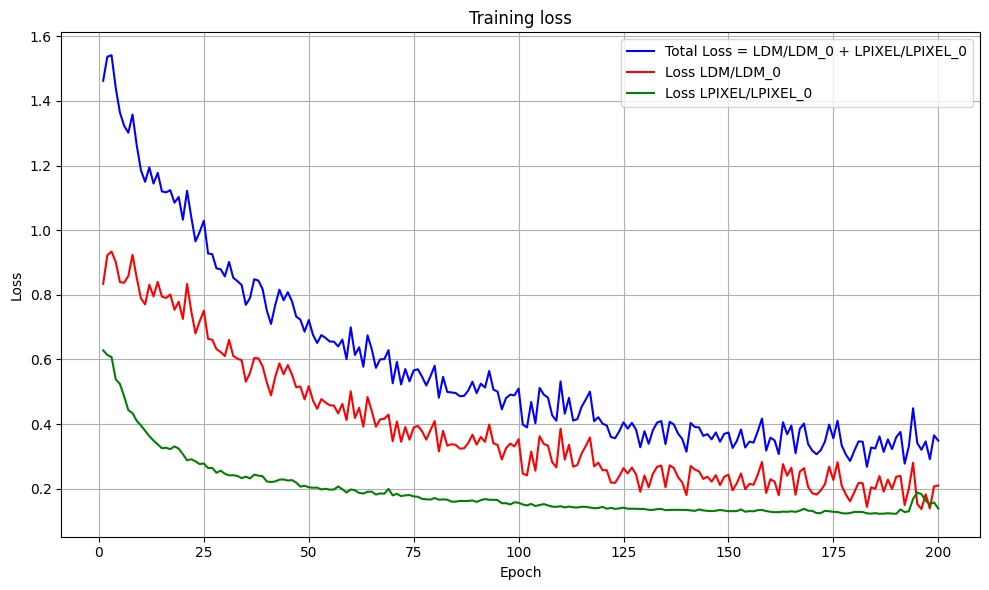

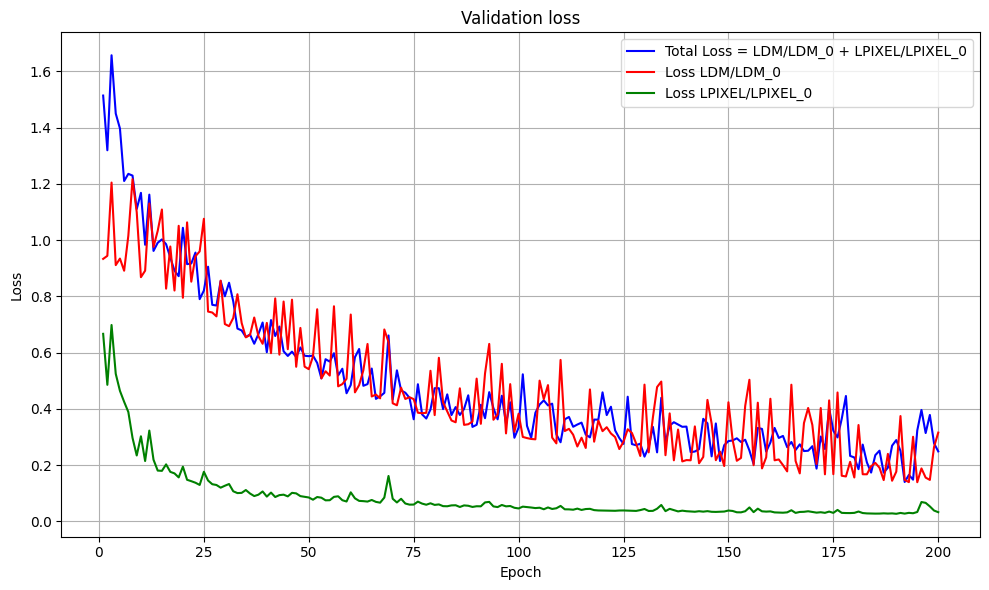

In [4]:
# Cell 5 (14 min)
num_epochs=200
learning_rate=1e-5
batch_size=1

loss_history=[]
ldm_loss_history=[]
pixel_loss_history=[]

val_loss_history=[]
val_ldm_loss_history=[]
val_pixel_loss_history=[]

params_to_optimize = [{'params': une.parameters()}]
optimizer = AdamW(params_to_optimize, lr=learning_rate)

# training loop
for epoch in range(num_epochs):
    total_loss=0
    total_ldm_loss=0
    total_pixel_loss=0

    total_val_loss=0
    total_val_ldm_loss=0
    total_val_pixel_loss=0

    # train mode only for unet
    une.train()
    vae.eval()
    enc.eval()
    for d in data:
        optimizer.zero_grad()
        toks = tok(text=d["text"], return_tensors='pt')
        toks = {k: v.to(device) for k, v in toks.items()}
        encs = enc(input_ids=toks['input_ids'], attention_mask=toks['attention_mask'])
        photo_path = "./coco_gsam_seg/" + d["file_name"][0:-4] + "/src.jpg"
        photo = Image.open(photo_path)
        photo = photo.resize((512, 512))
        photo_array = np.array(photo)
        photo_tensor = torch.tensor(photo_array, dtype=torch.float32).permute(2,0,1)/255.0
        photo_tensor = photo_tensor.unsqueeze(0).to(device)
        del toks
        del photo_path
        del photo
        del photo_array
        torch.cuda.empty_cache()
        lat = vae.encode(photo_tensor)
        lat_tens = lat.latent_dist.sample()
        del lat
        torch.cuda.empty_cache()
        noise = torch.randn_like(lat_tens)
        bsz = lat_tens.shape[0]
        max_timestep = sch.config.num_train_timesteps
        timesteps = torch.randint(0, max_timestep, (bsz,), device=lat_tens.device)
        timesteps = timesteps.long()
        noisy_latents = sch.add_noise(lat_tens, noise, timesteps)
        def q_hook(module, input, output):
            global q_activations
            q_activations=output

        def k_hook(module, input, output):
            global k_activations
            k_activations=output
        transformer_block = une.up_blocks[3].attentions[2].transformer_blocks[0]
        transformer_block.attn2.to_k.register_forward_hook(k_hook)
        transformer_block.attn2.to_q.register_forward_hook(q_hook)
        prediction = une(noisy_latents, timesteps, encs.last_hidden_state).sample
        loss_ldm = torch.nn.functional.mse_loss(prediction, lat_tens)
        del noise
        del bsz
        del timesteps
        del noisy_latents
        del prediction
        torch.cuda.empty_cache()
        lpixel = 0
        for token in d["attn_list"]:
            photo_path_token = "./coco_gsam_" + token[1]
            photo_token = Image.open(photo_path_token).convert('L')
            photo_token = photo_token.resize((64, 64))
            photo_array_token=np.array(photo_token)
            photo_tensor_token=torch.tensor(photo_array_token, dtype=torch.float32)/255.0
            del photo_path_token
            del photo_token
            del photo_array_token
            torch.cuda.empty_cache()
            toks_list = tok(text=d["text"])
            toks_word = tok(text=token[0])
            token_indices = []
            for k in range(len(toks_list['input_ids'])):
                if toks_list['input_ids'][k] == toks_word['input_ids'][1]:
                    if len(toks_list['input_ids'][k:]) >= len(toks_word['input_ids'])-2:
                        equal_for_the_moment = True
                        for l in range(1, len(toks_word['input_ids'])-1):
                            if toks_list['input_ids'][k+l-1] != toks_word['input_ids'][l]:
                                equal_for_the_moment = False
                        if equal_for_the_moment:
                            token_indices = list(range(k, k+len(toks_word['input_ids'])-2))
            attention_scores = compute_attention_scores()
            if attention_scores is not None:
                mean_attention = attention_scores[:,:,token_indices].mean(dim=2).mean(dim=0).reshape(64, 64)
                del token_indices
                del toks_list
                del toks_word
                torch.cuda.empty_cache()
                photo_tensor_token = photo_tensor_token.to(device)
                log_mean_attention=torch.log(mean_attention)  # log(prediction)
                log_one_minus_mean_attention=torch.log(1-mean_attention)  # log(1-prediction)
                a=photo_tensor_token*log_mean_attention  # image_tensor_token[u]*log(prediction[u])
                b=(1-photo_tensor_token)*log_one_minus_mean_attention  # (1-image_tensor_token[u])*log(1-prediction[u])
                final_result=(a+b).sum()
                del photo_tensor_token
                del mean_attention
                del a
                del b
                del log_mean_attention
                del log_one_minus_mean_attention
                torch.cuda.empty_cache()
                lpixel -= final_result
                del final_result

        # global loss
        loss = loss_ldm/loss_ldm0 + lpixel/lpixel0

        # backward
        loss.backward()
        optimizer.step()

        # losses update
        total_loss+=loss.item()
        total_ldm_loss += loss_ldm.item()
        total_pixel_loss+=lpixel.item()

    # loss update
    avg_loss = total_loss / len(data)
    avg_ldm_loss = total_ldm_loss / len(data)
    avg_pixel_loss = total_pixel_loss / len(data)
    loss_history.append(avg_loss)
    ldm_loss_history.append(avg_ldm_loss)
    pixel_loss_history.append(avg_pixel_loss)
    print(f'Epoch {epoch + 1}/{num_epochs}:')
    print(f'Average Loss: {avg_loss:.4f}')
    print(f'Average LDM Loss: {avg_ldm_loss:.4f}')
    print(f'Average Pixel Loss: {avg_pixel_loss:.4f}')


    une.eval()
    vae.eval()
    enc.eval()
    for d in validation_data:
      toks = tok(text=d["text"], return_tensors='pt')
      toks = {k: v.to(device) for k, v in toks.items()}
      encs = enc(input_ids=toks['input_ids'], attention_mask=toks['attention_mask'])
      del toks
      torch.cuda.empty_cache()
      photo_path = "./coco_gsam_seg/" + d["file_name"][0:-4] + "/src.jpg"
      photo = Image.open(photo_path)
      photo = photo.resize((512, 512))
      photo_array = np.array(photo)
      photo_tensor = torch.tensor(photo_array, dtype=torch.float32).permute(2,0,1)/255.0
      photo_tensor = photo_tensor.unsqueeze(0).to(device)
      del photo_path
      del photo
      del photo_array
      lat = vae.encode(photo_tensor)
      lat_tens = lat.latent_dist.sample()
      del lat
      torch.cuda.empty_cache()
      noise = torch.randn_like(lat_tens)
      bsz = lat_tens.shape[0]
      timesteps = torch.randint(0, sch.config.num_train_timesteps, (bsz,), device=lat_tens.device)
      timesteps = timesteps.long()
      noisy_latents = sch.add_noise(lat_tens, noise, timesteps)
      prediction = une(noisy_latents, timesteps, encs.last_hidden_state).sample
      val_loss_ldm = torch.nn.functional.mse_loss(prediction, lat_tens)
      del noise
      del bsz
      del timesteps
      del noisy_latents
      del prediction
      torch.cuda.empty_cache()
      val_lpixel = 0
      for token in d["attn_list"]:
          photo_path_token = "./coco_gsam_" + token[1]
          photo_token = Image.open(photo_path_token).convert('L')
          photo_token = photo_token.resize((64, 64))
          photo_array_token=np.array(photo_token)
          photo_tensor_token=torch.tensor(photo_array_token, dtype=torch.float32)/255.0
          del photo_path_token
          del photo_token
          del photo_array_token
          torch.cuda.empty_cache()
          toks_list = tok(text=d["text"])
          toks_word = tok(text=token[0])
          token_indices = []
          for k in range(len(toks_list['input_ids'])):
              if toks_list['input_ids'][k] == toks_word['input_ids'][1]:
                  if len(toks_list['input_ids'][k:]) >= len(toks_word['input_ids'])-2:
                      equal_for_the_moment = True
                      for l in range(1, len(toks_word['input_ids'])-1):
                          if toks_list['input_ids'][k+l-1] != toks_word['input_ids'][l]:
                              equal_for_the_moment = False
                      if equal_for_the_moment:
                          token_indices = list(range(k, k+len(toks_word['input_ids'])-2))
          attention_scores = compute_attention_scores()
          if attention_scores is not None:
              mean_attention = attention_scores[:,:,token_indices].mean(dim=2).mean(dim=0).reshape(64, 64)
              del token_indices
              del toks_list
              del toks_word
              torch.cuda.empty_cache()
              photo_tensor_token = photo_tensor_token.to(device)
              log_mean_attention=torch.log(mean_attention)  # log(prediction)
              log_one_minus_mean_attention=torch.log(1-mean_attention)  # log(1-prediction)
              a=photo_tensor_token*log_mean_attention  # image_tensor_token[u]*log(prediction[u])
              b=(1-photo_tensor_token)*log_one_minus_mean_attention  # (1-image_tensor_token[u])*log(1-prediction[u])
              final_result=(a+b).sum()
              del photo_tensor_token
              del mean_attention
              del a
              del b
              del log_mean_attention
              del log_one_minus_mean_attention
              torch.cuda.empty_cache()
              val_lpixel -= final_result




      loss = val_loss_ldm/loss_ldm0 + lpixel/lpixel0
      total_val_loss += loss.item()
      total_val_ldm_loss += loss_ldm.item()
      total_val_pixel_loss += lpixel.item()

    avg_val_loss=total_val_loss /len(validation_data)
    avg_val_ldm_loss=total_val_ldm_loss /len(validation_data)
    avg_val_pixel_loss=total_val_pixel_loss /len(validation_data)
    val_loss_history.append(avg_val_loss)
    val_ldm_loss_history.append(avg_val_ldm_loss)
    val_pixel_loss_history.append(avg_val_pixel_loss)


plt.figure(figsize=(10, 6))
epochs = range(1, num_epochs+1)
plt.plot(epochs, loss_history, label='Total Loss = LDM/LDM_0 + LPIXEL/LPIXEL_0', color='blue')
plt.plot(epochs, [x/loss_ldm0 for x in ldm_loss_history], label='Loss LDM/LDM_0', color='red')
plt.plot(epochs, [x/lpixel0 for x in pixel_loss_history], label='Loss LPIXEL/LPIXEL_0', color='green')
plt.title('Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('training_losses.png')
plt.show()



plt.figure(figsize=(10, 6))
epochs = range(1, num_epochs+1)
plt.plot(epochs, val_loss_history, label='Total Loss = LDM/LDM_0 + LPIXEL/LPIXEL_0', color='blue')
plt.plot(epochs, [x/loss_ldm0 for x in val_ldm_loss_history], label='Loss LDM/LDM_0', color='red')
plt.plot(epochs, [x/lpixel0 for x in val_pixel_loss_history], label='Loss LPIXEL/LPIXEL_0', color='green')
plt.title('Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('validation_losses.png')
plt.show()

### Training LDM + Ltoken + Lpixel

Epoch 1/200:
Average Loss: 3.2764
Average LDM Loss: 18.4594
Average Pixel Loss: 7623.6544
Average Token Loss: 1.5911
Epoch 2/200:
Average Loss: 2.8672
Average LDM Loss: 17.3696
Average Pixel Loss: 5981.0974
Average Token Loss: 1.4006
Epoch 3/200:
Average Loss: 2.6254
Average LDM Loss: 17.9820
Average Pixel Loss: 5653.7292
Average Token Loss: 1.1609
Epoch 4/200:
Average Loss: 2.2798
Average LDM Loss: 18.6017
Average Pixel Loss: 4711.5651
Average Token Loss: 0.8786
Epoch 5/200:
Average Loss: 2.1011
Average LDM Loss: 17.3436
Average Pixel Loss: 4589.5201
Average Token Loss: 0.7750
Epoch 6/200:
Average Loss: 2.0953
Average LDM Loss: 18.3886
Average Pixel Loss: 5140.8719
Average Token Loss: 0.6618
Epoch 7/200:
Average Loss: 2.0730
Average LDM Loss: 18.1245
Average Pixel Loss: 4374.3995
Average Token Loss: 0.7294
Epoch 8/200:
Average Loss: 2.1771
Average LDM Loss: 18.0369
Average Pixel Loss: 5431.4861
Average Token Loss: 0.7321
Epoch 9/200:
Average Loss: 1.8619
Average LDM Loss: 16.7325
Aver

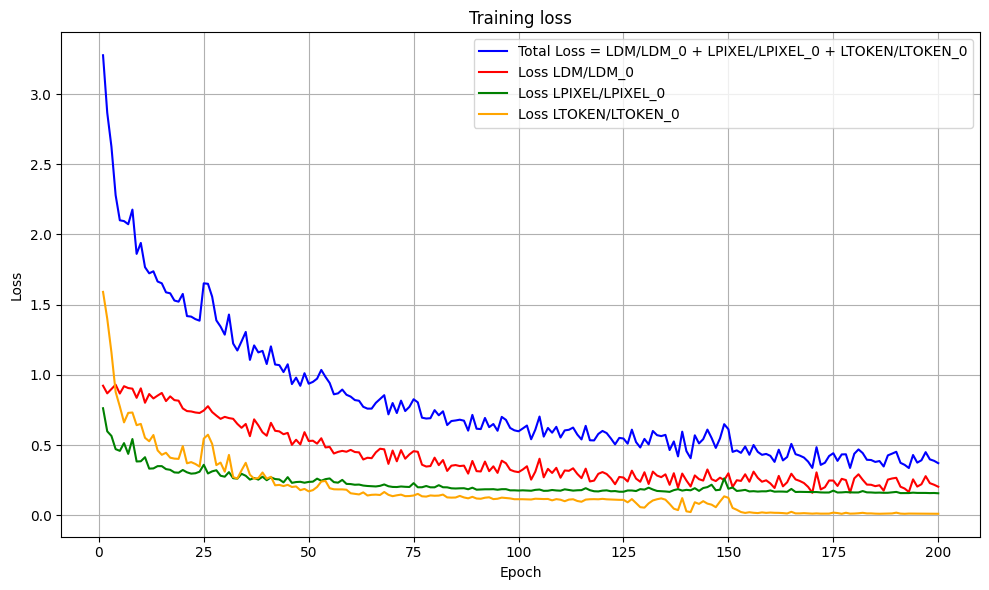

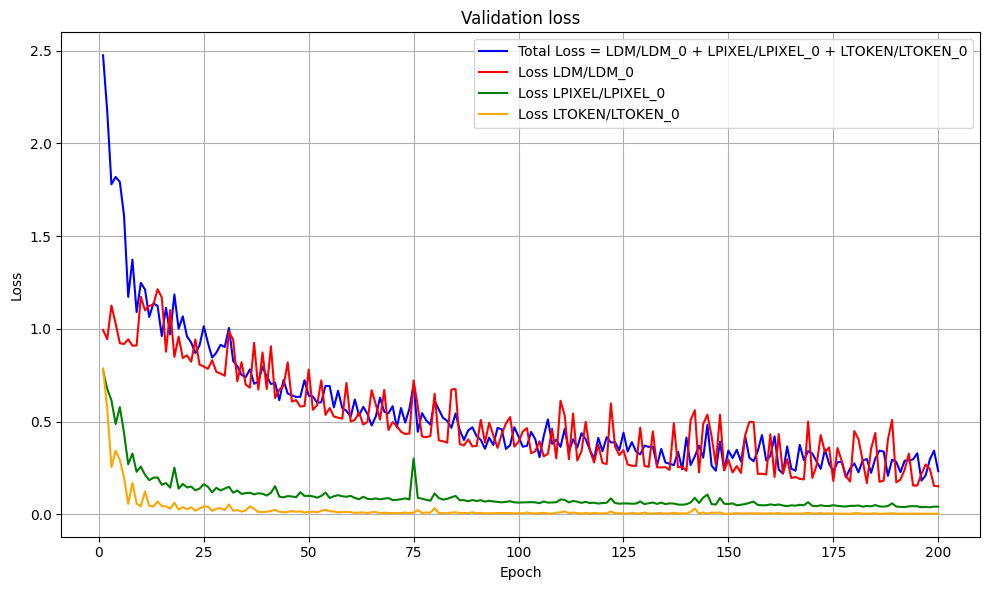

In [4]:
# Cell 6 (14 min)
num_epochs = 200
learning_rate = 1e-5
batch_size = 1

loss_history = []
ldm_loss_history = []
pixel_loss_history = []
token_loss_history = []

val_loss_history = []
val_ldm_loss_history = []
val_pixel_loss_history = []
val_token_loss_history = []

params_to_optimize = [{'params': une.parameters()}]
optimizer = AdamW(params_to_optimize, lr=learning_rate)

for epoch in range(num_epochs):
    total_loss = 0
    total_ldm_loss = 0
    total_pixel_loss = 0
    total_token_loss = 0
    total_val_loss = 0
    total_val_ldm_loss = 0
    total_val_pixel_loss = 0
    total_val_token_loss = 0
    une.train()
    vae.eval()
    enc.eval()
    for d in data:
        optimizer.zero_grad()
        toks = tok(text=d["text"], return_tensors='pt')
        toks = {k: v.to(device) for k, v in toks.items()}
        encs = enc(input_ids=toks['input_ids'], attention_mask=toks['attention_mask'])
        photo_path = "./coco_gsam_seg/" + d["file_name"][0:-4] + "/src.jpg"
        photo = Image.open(photo_path)
        photo = photo.resize((512, 512))
        photo_array = np.array(photo)
        photo_tensor = torch.tensor(photo_array, dtype=torch.float32).permute(2,0,1)/255.0
        photo_tensor = photo_tensor.unsqueeze(0).to(device)
        del toks
        del photo_path
        del photo
        del photo_array
        torch.cuda.empty_cache()
        lat = vae.encode(photo_tensor)
        lat_tens = lat.latent_dist.sample()
        del lat
        torch.cuda.empty_cache()
        noise = torch.randn_like(lat_tens)
        bsz = lat_tens.shape[0]
        max_timestep = sch.config.num_train_timesteps
        timesteps = torch.randint(0, max_timestep, (bsz,), device=lat_tens.device)
        timesteps = timesteps.long()
        noisy_latents = sch.add_noise(lat_tens, noise, timesteps)
        def q_hook(module, input, output):
            global q_activations
            q_activations=output
        def k_hook(module, input, output):
            global k_activations
            k_activations=output
        transformer_block = une.up_blocks[3].attentions[2].transformer_blocks[0]
        transformer_block.attn2.to_k.register_forward_hook(k_hook)
        transformer_block.attn2.to_q.register_forward_hook(q_hook)
        prediction = une(noisy_latents, timesteps, encs.last_hidden_state).sample
        loss_ldm = torch.nn.functional.mse_loss(prediction, lat_tens)
        del noise
        del bsz
        del timesteps
        del noisy_latents
        del prediction
        torch.cuda.empty_cache()
        lpixel = 0
        ltoken = 0
        for token in d["attn_list"]:
            photo_path_token = "./coco_gsam_" + token[1]
            photo_token = Image.open(photo_path_token).convert('L')
            photo_token = photo_token.resize((64, 64))
            photo_array_token=np.array(photo_token)
            photo_tensor_token=torch.tensor(photo_array_token, dtype=torch.float32)/255.0
            del photo_path_token
            del photo_token
            del photo_array_token
            torch.cuda.empty_cache()
            toks_list = tok(text=d["text"])
            toks_word = tok(text=token[0])
            token_indices = []
            for k in range(len(toks_list['input_ids'])):
                if toks_list['input_ids'][k] == toks_word['input_ids'][1]:
                    if len(toks_list['input_ids'][k:]) >= len(toks_word['input_ids'])-2:
                        equal_for_the_moment = True
                        for l in range(1, len(toks_word['input_ids'])-1):
                            if toks_list['input_ids'][k+l-1] != toks_word['input_ids'][l]:
                                equal_for_the_moment = False
                        if equal_for_the_moment:
                            token_indices = list(range(k, k+len(toks_word['input_ids'])-2))
            attention_scores = compute_attention_scores()
            if attention_scores is not None:
                mean_attention = attention_scores[:,:,token_indices].mean(dim=2).mean(dim=0).reshape(64, 64)
                del token_indices
                del toks_list
                del toks_word
                torch.cuda.empty_cache()
                photo_tensor_token = photo_tensor_token.to(device)
                log_mean_attention=torch.log(mean_attention)  # log(prediction)
                log_one_minus_mean_attention=torch.log(1-mean_attention)  # log(1-prediction)
                a=photo_tensor_token*log_mean_attention  # image_tensor_token[u]*log(prediction[u])
                b=(1-photo_tensor_token)*log_one_minus_mean_attention  # (1-image_tensor_token[u])*log(1-prediction[u])
                final_result=(a+b).sum()
                pixelwise_product = photo_tensor_token * mean_attention
                del photo_tensor_token
                torch.cuda.empty_cache()
                sum_pixelwise = pixelwise_product.sum()
                sum_mean_attention = mean_attention.sum()
                del pixelwise_product
                del mean_attention
                torch.cuda.empty_cache()
                ratio = sum_pixelwise/sum_mean_attention
                del sum_pixelwise
                del sum_mean_attention
                torch.cuda.empty_cache()
                result = (1-ratio)**2
                del a
                del b
                del log_mean_attention
                del log_one_minus_mean_attention
                torch.cuda.empty_cache()
                ltoken += result
                lpixel -= final_result
                del final_result
                del result

        loss = loss_ldm/loss_ldm0 + lpixel/lpixel0 + ltoken/ltoken0
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
        total_ldm_loss += loss_ldm.item()
        total_pixel_loss += lpixel.item()
        total_token_loss += ltoken.item()

    avg_loss = total_loss / len(data)
    avg_ldm_loss = total_ldm_loss / len(data)
    avg_pixel_loss = total_pixel_loss / len(data)
    avg_token_loss = total_token_loss / len(data)
    loss_history.append(avg_loss)
    ldm_loss_history.append(avg_ldm_loss)
    pixel_loss_history.append(avg_pixel_loss)
    token_loss_history.append(avg_token_loss)
    print(f'Epoch {epoch+1}/{num_epochs}:')
    print(f'Average Loss: {avg_loss:.4f}')
    print(f'Average LDM Loss: {avg_ldm_loss:.4f}')
    print(f'Average Pixel Loss: {avg_pixel_loss:.4f}')
    print(f'Average Token Loss: {avg_token_loss:.4f}')

    une.eval()
    vae.eval()
    enc.eval()
    for d in validation_data:
      toks = tok(text=d["text"], return_tensors='pt')
      toks = {k: v.to(device) for k, v in toks.items()}
      encs = enc(input_ids=toks['input_ids'], attention_mask=toks['attention_mask'])
      del toks
      torch.cuda.empty_cache()
      photo_path = "./coco_gsam_seg/" + d["file_name"][0:-4] + "/src.jpg"
      photo = Image.open(photo_path)
      photo = photo.resize((512, 512))
      photo_array = np.array(photo)
      photo_tensor = torch.tensor(photo_array, dtype=torch.float32).permute(2,0,1)/255.0
      photo_tensor = photo_tensor.unsqueeze(0).to(device)
      del photo_path
      del photo
      del photo_array
      torch.cuda.empty_cache()
      lat = vae.encode(photo_tensor)
      lat_tens = lat.latent_dist.sample()
      del lat
      torch.cuda.empty_cache()
      noise = torch.randn_like(lat_tens)
      bsz = lat_tens.shape[0]
      timesteps = torch.randint(0, sch.config.num_train_timesteps, (bsz,), device=lat_tens.device)
      timesteps = timesteps.long()
      noisy_latents = sch.add_noise(lat_tens, noise, timesteps)
      prediction = une(noisy_latents, timesteps, encs.last_hidden_state).sample
      val_loss_ldm = torch.nn.functional.mse_loss(prediction, lat_tens)
      del noise
      del bsz
      del timesteps
      del noisy_latents
      del prediction
      torch.cuda.empty_cache()
      val_lpixel = 0
      val_ltoken = 0
      for token in d["attn_list"]:
          photo_path_token = "./coco_gsam_" + token[1]
          photo_token = Image.open(photo_path_token).convert('L')
          photo_token = photo_token.resize((64, 64))
          photo_array_token=np.array(photo_token)
          photo_tensor_token=torch.tensor(photo_array_token, dtype=torch.float32)/255.0
          del photo_path_token
          del photo_token
          del photo_array_token
          torch.cuda.empty_cache()
          toks_list = tok(text=d["text"])
          toks_word = tok(text=token[0])
          token_indices = []
          for k in range(len(toks_list['input_ids'])):
              if toks_list['input_ids'][k] == toks_word['input_ids'][1]:
                  if len(toks_list['input_ids'][k:]) >= len(toks_word['input_ids'])-2:
                      equal_for_the_moment = True
                      for l in range(1, len(toks_word['input_ids'])-1):
                          if toks_list['input_ids'][k+l-1] != toks_word['input_ids'][l]:
                              equal_for_the_moment = False
                      if equal_for_the_moment:
                          token_indices = list(range(k, k+len(toks_word['input_ids'])-2))
          attention_scores = compute_attention_scores()
          if attention_scores is not None:
              mean_attention = attention_scores[:,:,token_indices].mean(dim=2).mean(dim=0).reshape(64, 64)
              del token_indices
              del toks_list
              del toks_word
              torch.cuda.empty_cache()
              photo_tensor_token = photo_tensor_token.to(device)
              log_mean_attention=torch.log(mean_attention)  # log(prediction)
              log_one_minus_mean_attention=torch.log(1-mean_attention)  # log(1-prediction)
              a=photo_tensor_token*log_mean_attention  # image_tensor_token[u]*log(prediction[u])
              b=(1-photo_tensor_token)*log_one_minus_mean_attention  # (1-image_tensor_token[u])*log(1-prediction[u])
              final_result=(a+b).sum()
              pixelwise_product = photo_tensor_token * mean_attention
              del photo_tensor_token
              torch.cuda.empty_cache()
              sum_pixelwise = pixelwise_product.sum()
              sum_mean_attention = mean_attention.sum()
              del pixelwise_product
              del mean_attention
              torch.cuda.empty_cache()
              ratio = sum_pixelwise/sum_mean_attention
              del sum_pixelwise
              del sum_mean_attention
              torch.cuda.empty_cache()
              result = (1-ratio)**2
              del a
              del b
              del log_mean_attention
              del log_one_minus_mean_attention
              torch.cuda.empty_cache()
              val_ltoken += result
              val_lpixel -= final_result
              del final_result
              del result


      loss = val_loss_ldm/loss_ldm0 + lpixel/lpixel0 + ltoken/ltoken0
      total_val_loss += loss.item()
      total_val_ldm_loss += loss_ldm.item()
      total_val_pixel_loss += lpixel.item()
      total_val_token_loss += ltoken.item()

    avg_val_loss=total_val_loss /len(validation_data)
    avg_val_ldm_loss=total_val_ldm_loss /len(validation_data)
    avg_val_pixel_loss=total_val_pixel_loss /len(validation_data)
    avg_val_token_loss=total_val_token_loss /len(validation_data)
    val_loss_history.append(avg_val_loss)
    val_ldm_loss_history.append(avg_val_ldm_loss)
    val_pixel_loss_history.append(avg_val_pixel_loss)
    val_token_loss_history.append(avg_val_token_loss)


plt.figure(figsize=(10, 6))
epochs = range(1, num_epochs+1)
plt.plot(epochs, loss_history, label='Total Loss = LDM/LDM_0 + LPIXEL/LPIXEL_0 + LTOKEN/LTOKEN_0', color='blue')
plt.plot(epochs, [x/loss_ldm0 for x in ldm_loss_history], label='Loss LDM/LDM_0', color='red')
plt.plot(epochs, [x/lpixel0 for x in pixel_loss_history], label='Loss LPIXEL/LPIXEL_0', color='green')
plt.plot(epochs, [x/ltoken0 for x in token_loss_history], label='Loss LTOKEN/LTOKEN_0', color='orange')
plt.title('Training loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('training_losses.png')
plt.show()


plt.figure(figsize=(10, 6))
epochs = range(1, num_epochs+1)
plt.plot(epochs, val_loss_history, label='Total Loss = LDM/LDM_0 + LPIXEL/LPIXEL_0 + LTOKEN/LTOKEN_0', color='blue')
plt.plot(epochs, [x/loss_ldm0 for x in val_ldm_loss_history], label='Loss LDM/LDM_0', color='red')
plt.plot(epochs, [x/lpixel0 for x in val_pixel_loss_history], label='Loss LPIXEL/LPIXEL_0', color='green')
plt.plot(epochs, [x/ltoken0 for x in val_token_loss_history], label='Loss LTOKEN/LTOKEN_0', color='orange')
plt.title('Validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig('validation_losses.png')
plt.show()

### Inference post training

using GPU
torch.Size([1, 20, 768])
torch.Size([1, 3, 512, 512])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])


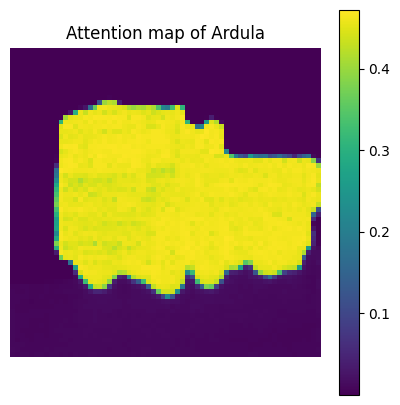

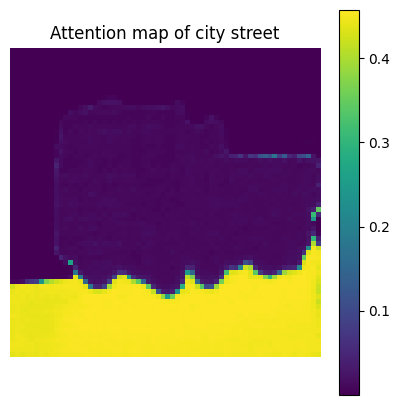

torch.Size([1, 11, 768])
torch.Size([1, 3, 512, 512])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])


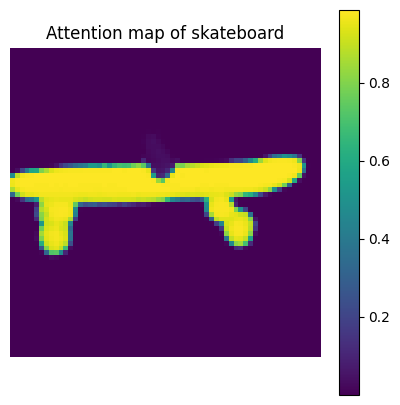

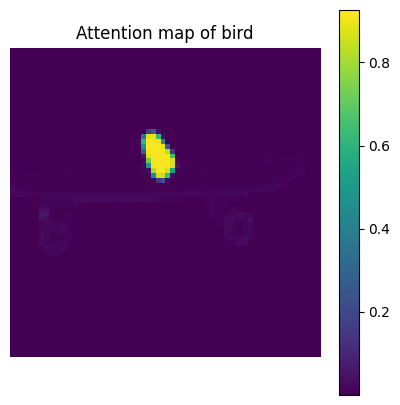

torch.Size([1, 13, 768])
torch.Size([1, 3, 512, 512])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])


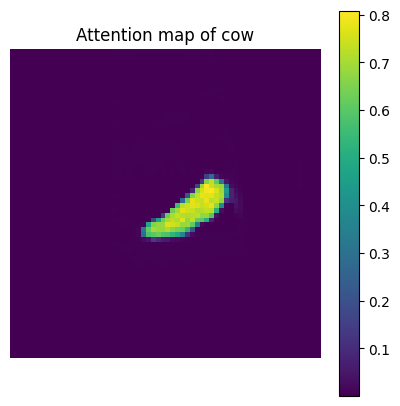

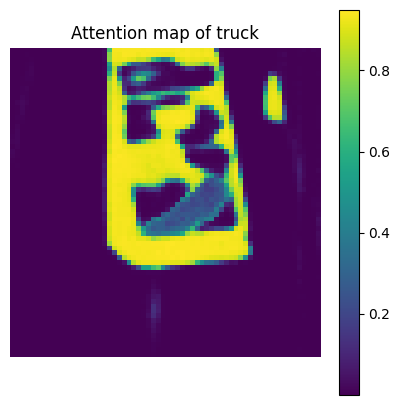

torch.Size([1, 14, 768])
torch.Size([1, 3, 512, 512])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])


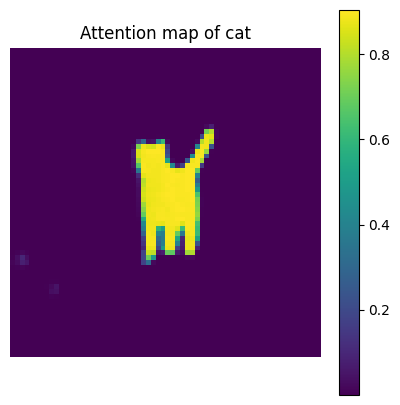

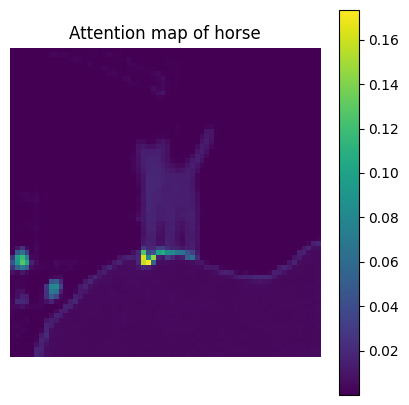

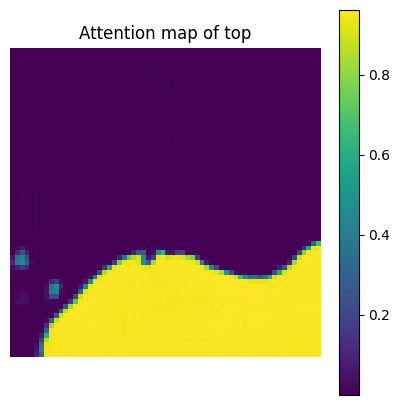

torch.Size([1, 17, 768])
torch.Size([1, 3, 512, 512])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])


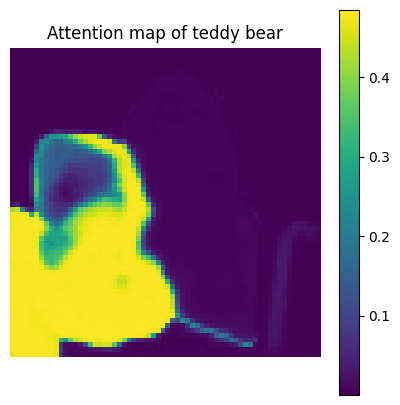

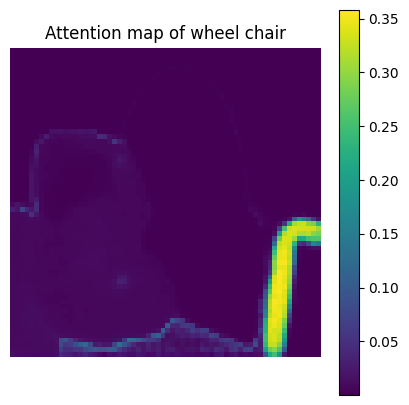

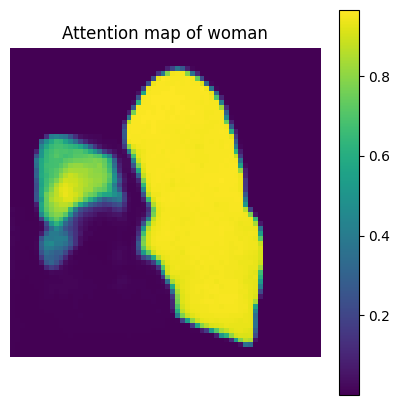

torch.Size([1, 11, 768])
torch.Size([1, 3, 512, 512])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])


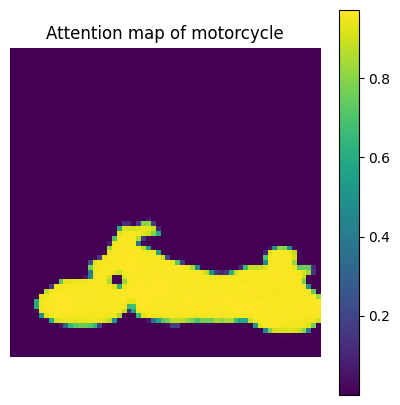

torch.Size([1, 12, 768])
torch.Size([1, 3, 512, 512])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])


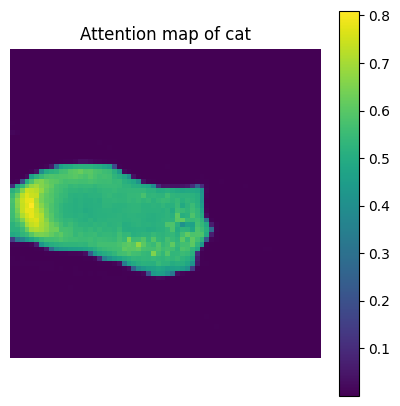

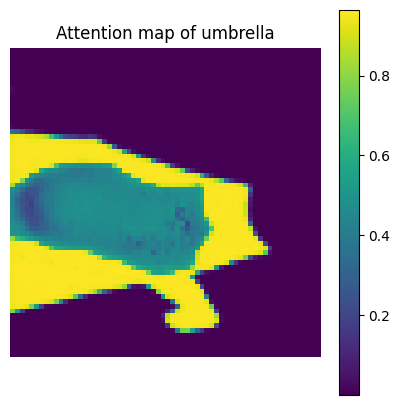

torch.Size([1, 11, 768])
torch.Size([1, 3, 512, 512])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])


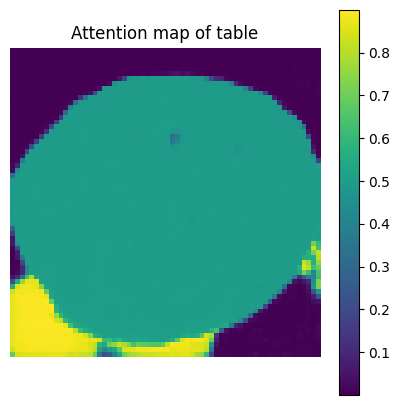

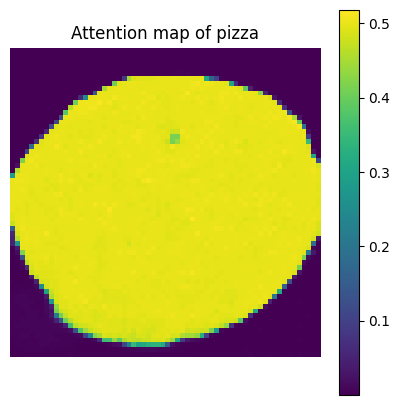

torch.Size([1, 20, 768])
torch.Size([1, 3, 512, 512])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])


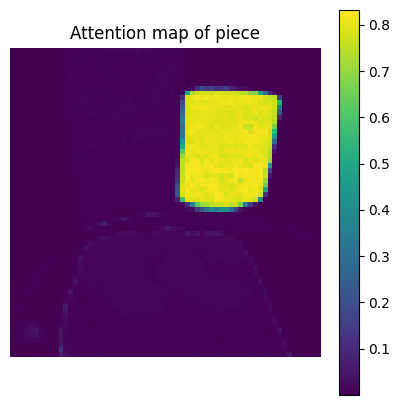

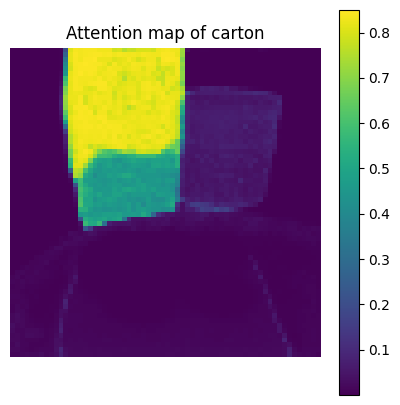

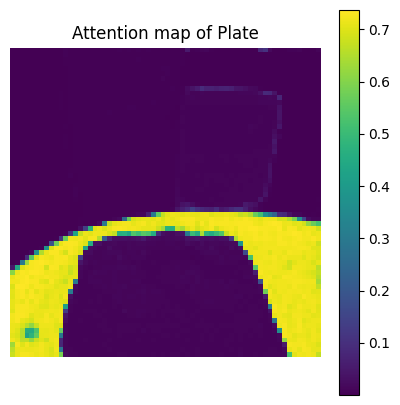

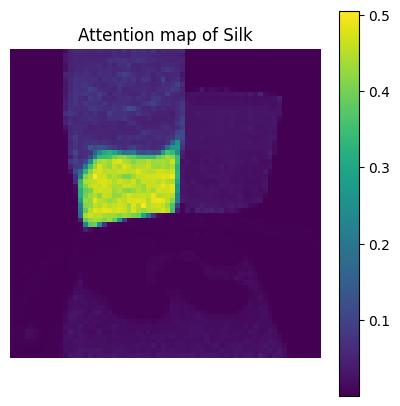

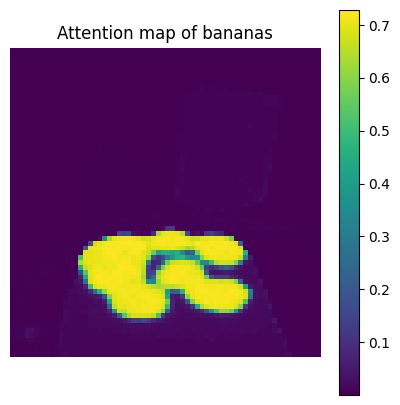

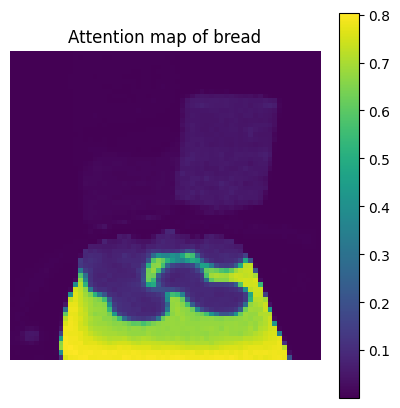

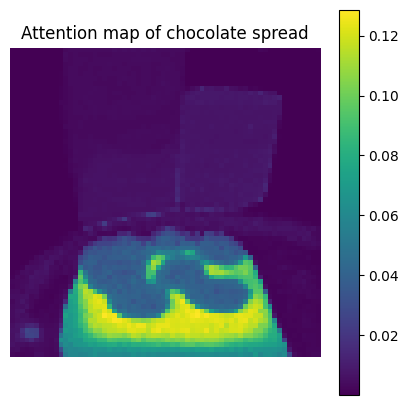

torch.Size([1, 14, 768])
torch.Size([1, 3, 512, 512])
torch.Size([1, 4, 64, 64])
torch.Size([1, 4, 64, 64])


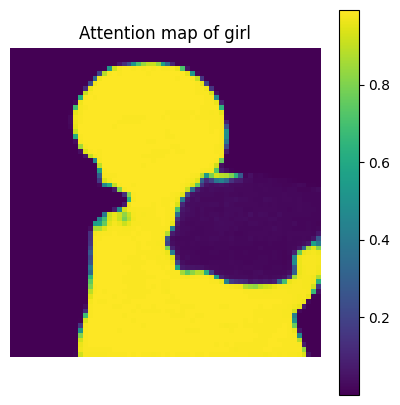

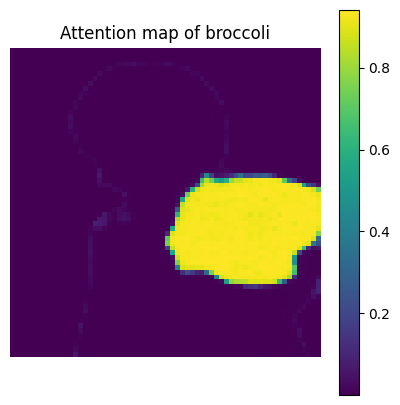

In [5]:
# Cell 7 (5s)
if torch.cuda.is_available():
  device=torch.device("cuda")
  print(f"using GPU")
else:
  device=torch.device("cpu")
  print(f"using CPU")

une.eval()
vae.eval()
enc.eval()

for d in data:
    # Retrieve the prompt and run it through the tokenizer (CPU) then text_encoder (GPU)
    toks=tok(text=d["text"],return_tensors='pt') # if I don't fill in return_tensors, the elements of toks will be lists (but encs takes tensors as inputs) -> 'pt'="pytorch"
    toks={Key:Value.to(device) for Key,Value in toks.items()}  # transfer the data on GPU
    encs=enc(input_ids=toks['input_ids'],attention_mask=toks['attention_mask'])
    print(encs.last_hidden_state.shape)
    # torch.Size([1, 20, 768]) for the 1st image
    # torch.Size([1, 14, 768]) for the 2nd image (only the length of sequence varies)
    # (batch size, sequence length, dimension of text embedding)

    # Retrieving the image and transferring it to the vae
    photo_path = "./coco_gsam_seg/" + d["file_name"][0:-4] + "/src.jpg"
    photo=Image.open(photo_path)
    photo=photo.resize((512, 512))
    photo_array=np.array(photo)
    photo_tensor=torch.tensor(photo_array, dtype=torch.float32).permute(2,0,1)/255.0
    photo_tensor=photo_tensor.unsqueeze(0).to(device)  # vae takes 4-dimension tensor as input so we must add a first dimension artificially
    print(photo_tensor.shape)
    # torch.Size([1, 3, 512, 512])

    # encode the photo with autoencoder kl to obtain latent
    lat=vae.encode(photo_tensor)
    lat_tens=lat.latent_dist.sample() # obtain the tensor associated with the latent
    print(lat_tens.shape)
    # torch.Size([1, 4, 64, 64])

    # add noise
    # here I used the code from https://github.com/mlpc-ucsd/TokenCompose
    noise = torch.randn_like(lat_tens)
    bsz = lat_tens.shape[0]
    max_timestep = sch.config.num_train_timesteps
    timesteps = torch.randint(0, max_timestep, (bsz,), device=lat_tens.device)
    timesteps = timesteps.long()
    noisy_latents = sch.add_noise(lat_tens, noise, timesteps)
    print(noisy_latents.shape)
    # torch.Size([1, 4, 64, 64])

    '''
    We add the hook just right here
    '''
    def q_hook(module, input, output):
        global q_activations
        q_activations=output

    def k_hook(module, input, output):
        global k_activations
        k_activations=output
    transformer_block = une.up_blocks[3].attentions[2].transformer_blocks[0]
    transformer_block.attn2.to_k.register_forward_hook(k_hook)
    transformer_block.attn2.to_q.register_forward_hook(q_hook)
    prediction = une(noisy_latents, timesteps, encs.last_hidden_state).sample

    del timesteps
    del noisy_latents
    del noise
    del max_timestep
    del bsz
    del prediction

    for token in d["attn_list"]:
      toks_list=tok(text=d["text"])
      toks_word=tok(text=token[0])
      token_indices=[]
      for k in range(len(toks_list['input_ids'])):
        if toks_list['input_ids'][k]==toks_word['input_ids'][1]:
          if len(toks_list['input_ids'][k:])>=len(toks_word['input_ids'])-2:
            equal_for_the_moment=True
            for l in range(1,len(toks_word['input_ids'])-1):
              if toks_list['input_ids'][k+l-1]!=toks_word['input_ids'][l]:
                equal_for_the_moment=False
            if equal_for_the_moment:
              token_indices=list(range(k,k+len(toks_word['input_ids'])-2))

      attention_scores=compute_attention_scores()
      mean_attention = attention_scores[:,:,token_indices].mean(dim=2).mean(dim=0).reshape(64, 64)

      del toks_list
      del toks_word
      del token_indices
      del equal_for_the_moment
      del attention_scores

      mean_attention_plot=mean_attention.cpu().detach()
      plt.figure(figsize=(5, 5))
      plt.imshow(mean_attention_plot, cmap='viridis')
      plt.colorbar()
      plt.title(f'Attention map of {token[0]}')
      plt.axis('off')
      plt.show()